##### Методы и алгоритмы компьютерного зрения
---

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Методы кластеризации в Python

#### 1. Метод k-means

In [125]:
pip install sklearn

In [126]:
from sklearn.datasets import make_blobs

In [127]:
import numpy as np                                   # Массивы
import matplotlib.pyplot as plt                      # Графики
%matplotlib inline

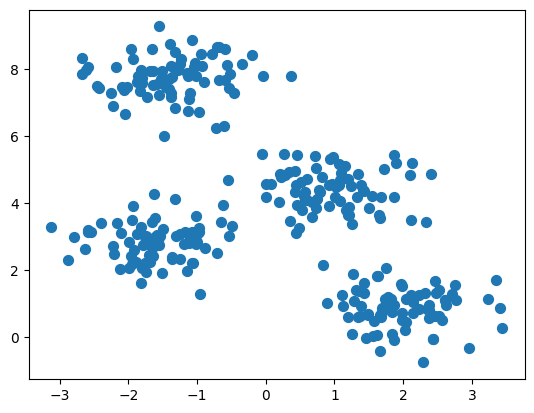

In [128]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


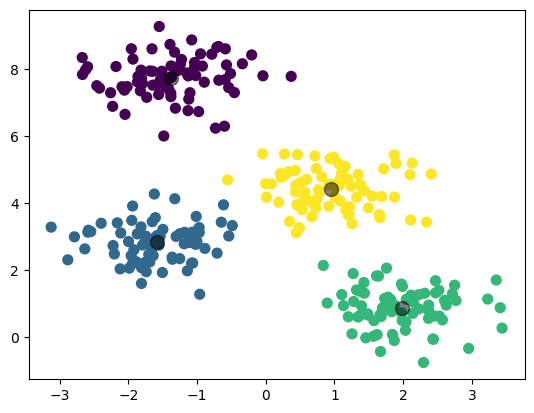

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

### 1.1. Распознавание рукописных цифр методом k-means

In [130]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [131]:
kmeans = KMeans(n_clusters = 10)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Центры кластеров

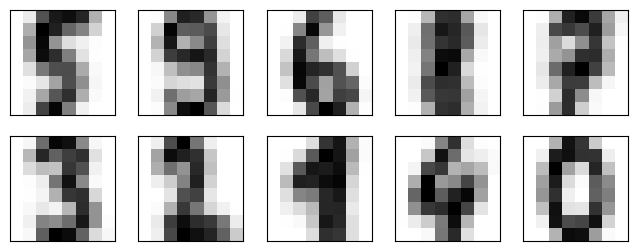

In [132]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

##### Ошибка

In [133]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels))

0.7874234835837507


##### Пример

Пусть задана выборка $\mathrm{x}_1=(1,1)^T$, $\mathrm{x}_2=(0,0)^T$, $\mathrm{x}_3=(2,1)^T$, $\mathrm{x}_4=(4,4)^T$, $\mathrm{x}_5=(5,5)^T$, $\mathrm{x}_6=(5,3)^T$. Найти кластеризацию этих образов по двум классам методом $k$-means.

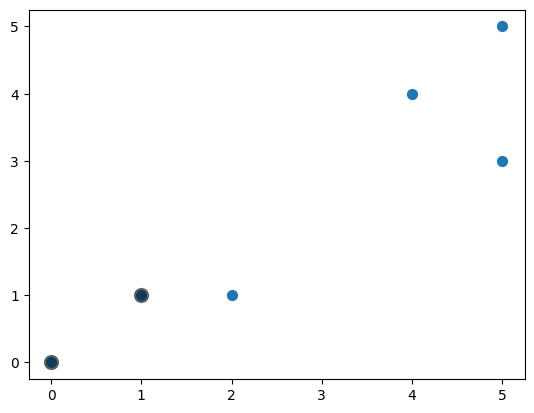

In [134]:
X = np.array([[1, 1], [0, 0], [2, 1], [4, 4], [5, 5], [5, 3]])
centers = np.array([[1, 1], [0, 0]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

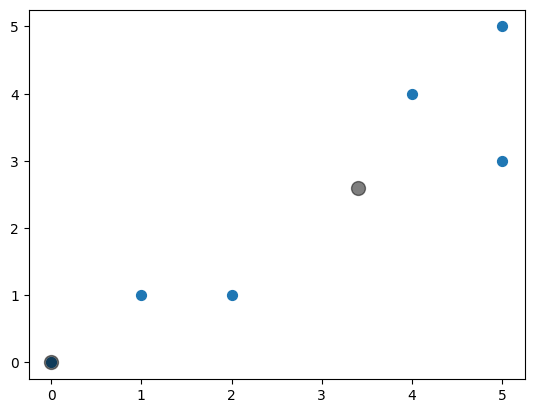

In [135]:
centers = np.array([[17./5., 13./5.], [0, 0]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

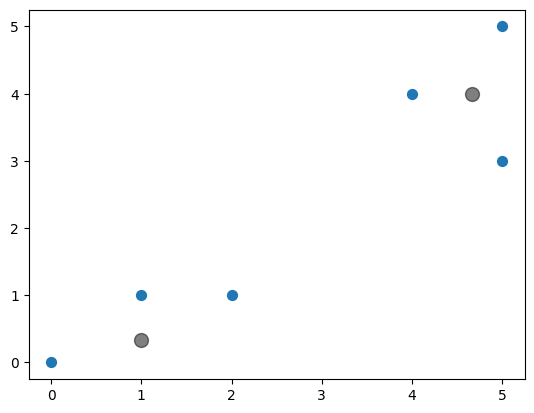

In [136]:
centers = np.array([[14./3., 4], [1, 1./3.]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

#### 1.2. EM-алгоритм

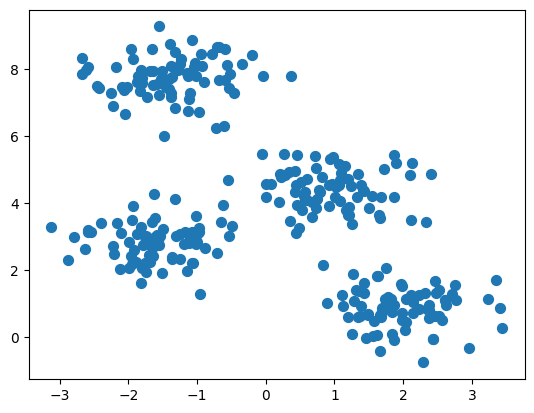

In [137]:
from sklearn.datasets import make_blobs
import numpy as np                                   # Массивы
import matplotlib.pyplot as plt                      # Графики
%matplotlib inline

X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

In [138]:
rnd = np.random.RandomState(13)
X_stretched = np.dot(X, rnd.randn(2, 2))

In [139]:
rnd.randn(2, 2)

array([[1.34510171, 0.53233789],
       [1.3501879 , 0.86121137]])

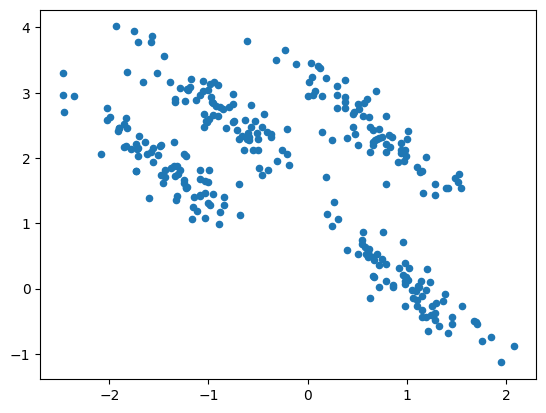

In [140]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s = 20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


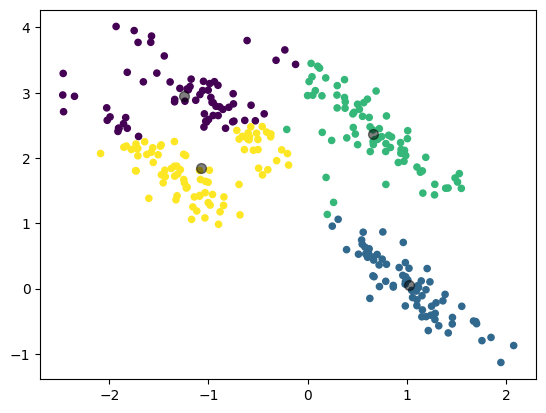

In [141]:
from sklearn.cluster import KMeans # Для сравнения методом к-средних
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c = y_kmeans, s = 20, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 50, alpha = 0.5)

In [142]:
y_kmeans

array([3, 2, 0, 2, 3, 0, 1, 0, 0, 2, 1, 2, 0, 2, 3, 3, 0, 3, 1, 1, 0, 3,
       0, 1, 1, 2, 3, 0, 1, 3, 2, 2, 0, 2, 2, 2, 2, 2, 1, 3, 3, 1, 2, 0,
       1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 3, 1, 0, 1, 2, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 3, 2, 3, 3, 3, 3, 2, 0, 3, 0,
       2, 2, 3, 3, 2, 1, 1, 0, 3, 0, 0, 1, 2, 3, 2, 3, 0, 3, 3, 0, 2, 0,
       1, 1, 3, 2, 3, 0, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 2, 2, 2, 0, 2, 3,
       3, 1, 2, 1, 3, 0, 2, 3, 3, 3, 0, 1, 1, 3, 3, 0, 0, 2, 3, 0, 1, 2,
       0, 0, 3, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 2, 3, 1, 0, 3, 1, 1, 1, 0,
       1, 2, 0, 1, 3, 1, 0, 2, 1, 2, 0, 2, 0, 1, 3, 0, 2, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 3, 1, 3, 2, 2, 0, 0, 2, 3, 3, 1, 0, 3, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 1, 3,
       2, 1, 0, 2, 0, 3, 3, 1, 1, 0, 0, 3, 3, 0, 2, 2, 0, 0, 0, 3, 3, 0,
       2, 1, 2, 0, 3, 3, 2, 2, 2, 3, 0, 3, 0, 1], d

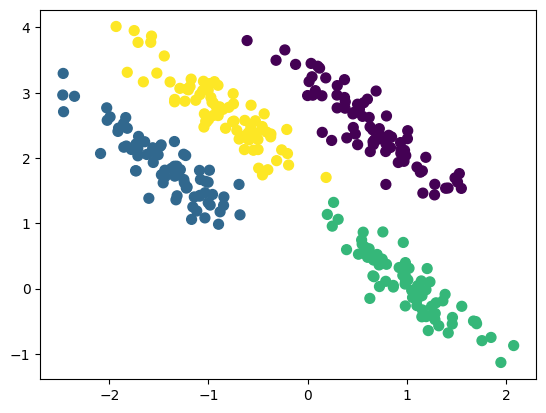

In [143]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4) # ЕМ-алгоритм
gmm.fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c = labels, s = 50, cmap = 'viridis')

### Сегментация изображений. Задание.

Пусть дано цветное изображение. В качестве вектор-признака пикселя примем вектор (r, g, b). Используя методы кластеризации, разбить полученное множество векторов на кластеры -- сегменты.

In [144]:
from PIL import Image                 # для работы с изображениями

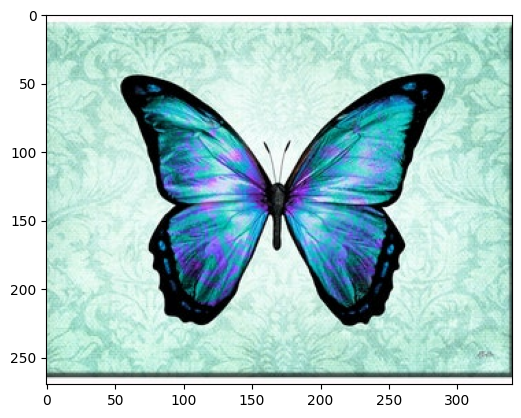

In [145]:
# открываем картинку и преобразуем в монохромное
im = np.array(Image.open('segment.jpg'))
fig = plt.figure()
plt.imshow(im)

In [146]:
m, n, s = im.shape

In [147]:
im = im.reshape((m * n, s)) # Здесь векторы-признаки пикселей
im.shape

(91800, 3)

In [148]:
im = im.reshape((m * n, s))
im.shape

(91800, 3)

In [149]:
from sklearn.cluster import KMeans
n_clusters = 3
'''
метод к-средних...
'''
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(im)
y_kmeans = kmeans.predict(im)  # Прогноз кластеров для каждого пикселя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [150]:
im[:, 0] = (y_kmeans[:] / n_clusters) * 255
im[:, 1] = (y_kmeans[:] / n_clusters) * 255
im[:, 2] = (y_kmeans[:] / n_clusters) * 255

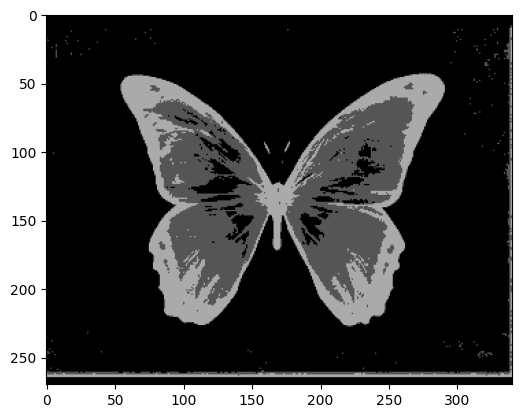

In [151]:
''' Сегментация методом к-средних '''
im_1 = im.reshape((m, n, s))
fig = plt.figure()
plt.imshow(im_1)

In [152]:
'''
ЕМ-алгоритм
'''
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(im)
y_gmm = gmm.predict(im)

In [153]:
im[:, 0] = (y_gmm[:] / n_clusters) * 255
im[:, 1] = (y_gmm[:] / n_clusters) * 255
im[:, 2] = (y_gmm[:] / n_clusters) * 255

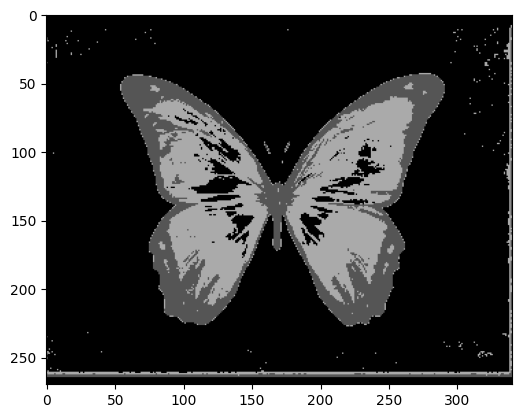

In [154]:
''' Сегментация с помощью ЕМ-алгоритма'''

im_1 = im.reshape((m, n, s))
fig = plt.figure()
plt.imshow(im_1)